loading Roboflow workspace...
loading Roboflow project...
Датасет успешно загружен!
Путь к датасету: /content/License-Plate-Recognition-11
АНАЛИЗ ДАТАСЕТА:
Путь к data.yaml: /content/License-Plate-Recognition-11/data.yaml
Количество классов: 1
Классы: ['License_Plate']

Анализ Train выборки:
Проверяем путь: /content/License-Plate-Recognition-11/train/images
  Найдено изображений: 7057

Анализ Validation выборки:
Проверяем путь: /content/License-Plate-Recognition-11/valid/images
  Найдено изображений: 2048

Анализ Test выборки:
Проверяем путь: /content/License-Plate-Recognition-11/test/images
  Найдено изображений: 1020

РАСПРЕДЕЛЕНИЕ ДАННЫХ:
  - Train: 7057 изображений (69.7%)
  - Validation: 2048 изображений (20.2%)
  - Test: 1020 изображений (10.1%)


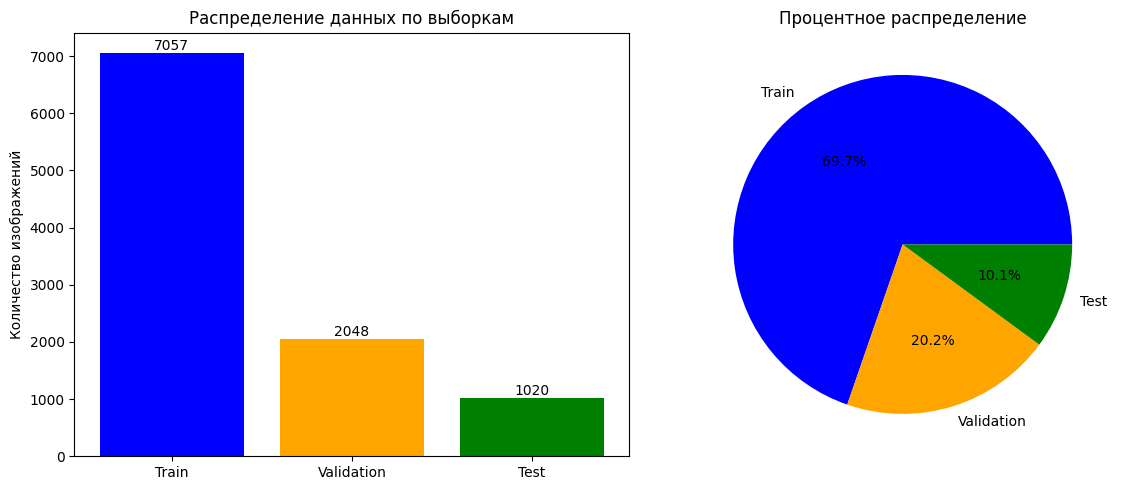


ПРОВЕРКА СТРУКТУРЫ ДАТАСЕТА:
 Корневая директория датасета:
Содержимое /content/License-Plate-Recognition-11:
  - data.yaml
  - train
  - valid
  - README.roboflow.txt
  - README.dataset.txt
  ... и еще 1 элементов

 Директория train:
Содержимое /content/License-Plate-Recognition-11/train:
  - images
  - labels
Содержимое /content/License-Plate-Recognition-11/train/images:
  - pic_164_jpg.rf.252bf56672a4c67cb6aab4fef68cd750.jpg
  - CarLongPlateGen2753_jpg.rf.bc8e302cfc8e1225c1fd6136fd8fc17b.jpg
  - xemay2238_jpg.rf.da88d159f2bb550d260d1a6a4cbe6b6e.jpg
  - xemay1970_jpg.rf.6fa607c5cbb2a3e913f448cb7c9e4674.jpg
  - xemay1469_jpg.rf.0f158b379c7b5606e914922444a79aae.jpg
  ... и еще 7052 элементов
  Пример файла: /content/License-Plate-Recognition-11/train/images/pic_164_jpg.rf.252bf56672a4c67cb6aab4fef68cd750.jpg
  Размер: 82445 байт
Содержимое /content/License-Plate-Recognition-11/train/labels:
  - xemay1302_jpg.rf.87eeec24385f1c90a17aba9a54024798.txt
  - xemayBigPlate21_jpg.rf.1824cbaf74

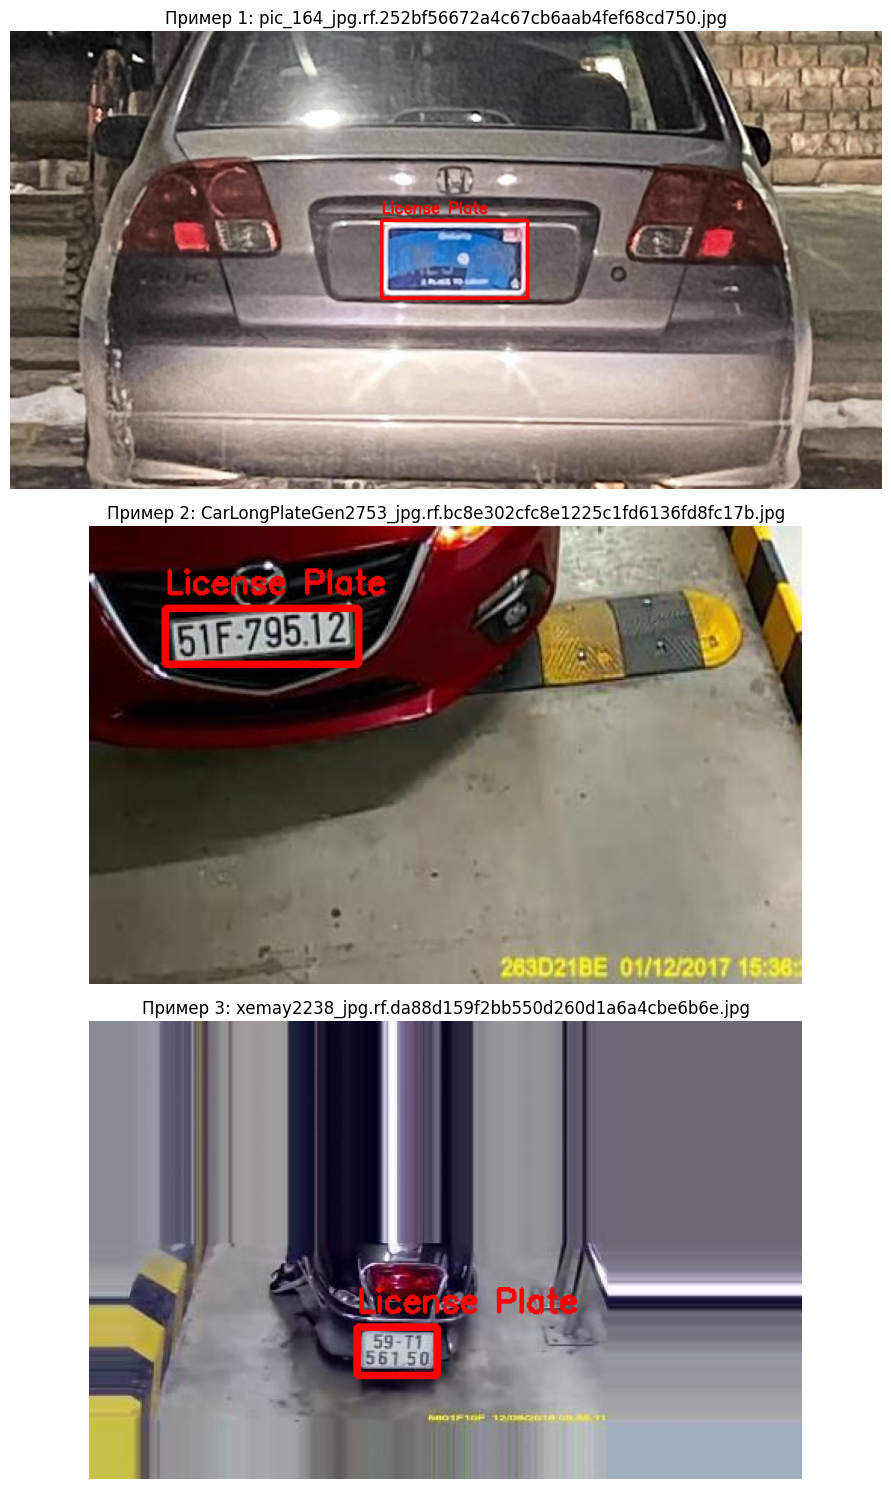

Текущие пути в data.yaml:
  train: ../train/images
  val: ../valid/images
  test: ../test/images
   train: путь существует
   val: путь существует
   test: путь существует

АНАЛИЗ ДАТАСЕТА ЗАВЕРШЕН!


In [5]:
!pip install roboflow ultralytics -q
!pip install matplotlib seaborn

import torch
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os
from google.colab import files
import pandas as pd
import yaml

rf = Roboflow(api_key="u1g4JSOm4Hf8ZtQAYkwU")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov11")

print("Датасет успешно загружен!")
print(f"Путь к датасету: {dataset.location}")

def analyze_dataset(dataset_path):
    print("АНАЛИЗ ДАТАСЕТА:")
    print("=" * 50)

    data_yaml_path = f'{dataset_path}/data.yaml'
    print(f"Путь к data.yaml: {data_yaml_path}")

    with open(data_yaml_path, 'r') as f:
        data_config = yaml.safe_load(f)

    print(f"Количество классов: {data_config['nc']}")
    print(f"Классы: {data_config['names']}")

    def count_images(split_path):
        if split_path.startswith('../'):
            absolute_path = os.path.join(dataset_path, split_path[3:])
        else:
            absolute_path = os.path.join(dataset_path, split_path)

        print(f"Проверяем путь: {absolute_path}")

        if os.path.exists(absolute_path):
            image_count = len([f for f in os.listdir(absolute_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
            print(f"  Найдено изображений: {image_count}")
            return image_count
        else:
            print(f"  Путь не существует!")
            return 0

    splits = {
        'Train': data_config.get('train', ''),
        'Validation': data_config.get('val', ''),
        'Test': data_config.get('test', '')
    }

    counts = {}
    for split_name, split_path in splits.items():
        print(f"\nАнализ {split_name} выборки:")
        counts[split_name] = count_images(split_path)

    print(f"\nРАСПРЕДЕЛЕНИЕ ДАННЫХ:")
    total_images = sum(counts.values())
    for split_name, count in counts.items():
        percentage = (count / total_images * 100) if total_images > 0 else 0
        print(f"  - {split_name}: {count} изображений ({percentage:.1f}%)")

    if total_images > 0:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        splits_list = list(counts.keys())
        counts_list = list(counts.values())
        colors = ['blue', 'orange', 'green']

        bars = plt.bar(splits_list, counts_list, color=colors)
        plt.title('Распределение данных по выборкам')
        plt.ylabel('Количество изображений')

        for bar, count in zip(bars, counts_list):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(count), ha='center', va='bottom')

        plt.subplot(1, 2, 2)
        plt.pie(counts_list, labels=splits_list, autopct='%1.1f%%', colors=colors)
        plt.title('Процентное распределение')

        plt.tight_layout()
        plt.show()
    else:
        print("Нет данных для визуализации!")

    return data_config, counts

data_config, counts = analyze_dataset(dataset.location)

def check_dataset_structure(dataset_path):
    print("\nПРОВЕРКА СТРУКТУРЫ ДАТАСЕТА:")
    print("=" * 50)

    def list_directory_contents(path, max_items=5):
        if os.path.exists(path):
            items = os.listdir(path)
            print(f"Содержимое {path}:")
            for item in items[:max_items]:
                print(f"  - {item}")
            if len(items) > max_items:
                print(f"  ... и еще {len(items) - max_items} элементов")
            return items
        else:
            print(f"  Путь не существует: {path}")
            return []

    print(" Корневая директория датасета:")
    list_directory_contents(dataset_path)

    subdirs = ['train', 'valid', 'test', 'Train', 'Valid', 'Test']
    for subdir in subdirs:
        subdir_path = os.path.join(dataset_path, subdir)
        if os.path.exists(subdir_path):
            print(f"\n Директория {subdir}:")
            list_directory_contents(subdir_path)

            for content in ['images', 'labels']:
                content_path = os.path.join(subdir_path, content)
                if os.path.exists(content_path):
                    items = list_directory_contents(content_path)
                    if items:
                        sample_file = os.path.join(content_path, items[0])
                        print(f"  Пример файла: {sample_file}")
                        print(f"  Размер: {os.path.getsize(sample_file) if os.path.isfile(sample_file) else 'N/A'} байт")

check_dataset_structure(dataset.location)

def visualize_samples_fixed(dataset_path, num_samples=3):
    print("\n ВИЗУАЛИЗАЦИЯ ПРИМЕРОВ ДАННЫХ:")
    print("=" * 50)

    image_extensions = ('.jpg', '.png', '.jpeg')
    image_files = []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_files.append(os.path.join(root, file))

    print(f"Найдено всего изображений: {len(image_files)}")

    if not image_files:
        print(" Изображения не найдены!")
        return

    sample_images = image_files[:min(num_samples, len(image_files))]

    plt.figure(figsize=(15, 5 * len(sample_images)))

    for i, img_path in enumerate(sample_images):
        print(f"Обрабатываем: {img_path}")

        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"   Не удалось загрузить изображение")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            label_path = img_path.replace('images', 'labels').rsplit('.', 1)[0] + '.txt'

            if not os.path.exists(label_path):
                label_path = img_path.replace('Images', 'Labels').rsplit('.', 1)[0] + '.txt'
            if not os.path.exists(label_path):
                base_name = os.path.splitext(os.path.basename(img_path))[0]
                label_path = os.path.join(os.path.dirname(img_path).replace('images', 'labels'), base_name + '.txt')

            if os.path.exists(label_path):
                print(f"  Найдена разметка: {label_path}")
                with open(label_path, 'r') as f:
                    annotations = f.readlines()

                h, w = img.shape[:2]

                for ann in annotations:
                    parts = ann.strip().split()
                    if len(parts) >= 5:
                        class_id, x_center, y_center, bbox_w, bbox_h = map(float, parts[:5])

                        x1 = int((x_center - bbox_w/2) * w)
                        y1 = int((y_center - bbox_h/2) * h)
                        x2 = int((x_center + bbox_w/2) * w)
                        y2 = int((y_center + bbox_h/2) * h)

                        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
                        cv2.putText(img, f'License Plate', (x1, y1-10),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            plt.subplot(len(sample_images), 1, i+1)
            plt.imshow(img)
            plt.title(f'Пример {i+1}: {os.path.basename(img_path)}')
            plt.axis('off')

        except Exception as e:
            print(f"   Ошибка при обработке изображения: {e}")
            continue

    plt.tight_layout()
    plt.show()

visualize_samples_fixed(dataset.location)

def fix_data_yaml(dataset_path):
    data_yaml_path = f'{dataset_path}/data.yaml'

    with open(data_yaml_path, 'r') as f:
        data_config = yaml.safe_load(f)

    print("Текущие пути в data.yaml:")
    print(f"  train: {data_config.get('train', 'N/A')}")
    print(f"  val: {data_config.get('val', 'N/A')}")
    print(f"  test: {data_config.get('test', 'N/A')}")

    for split in ['train', 'val', 'test']:
        if split in data_config:
            path = data_config[split]
            if path.startswith('../'):
                absolute_path = os.path.join(dataset_path, path[3:])
            else:
                absolute_path = os.path.join(dataset_path, path)

            if os.path.exists(absolute_path):
                print(f"   {split}: путь существует")
            else:
                print(f"   {split}: путь не существует - {absolute_path}")

    return data_config

data_config = fix_data_yaml(dataset.location)

print("\n" + "="*60)
print("АНАЛИЗ ДАТАСЕТА ЗАВЕРШЕН!")
print("="*60)